In the previous two notebooks, we did some basic initial exploration of the data, and then we cleaned the data to remove any null values. The next step is to do further exploration of the data to gain some ideas as to what variables seem most important and also which ones might be correlated with one another. From our results, we may also create new features - this later step is called feature engineering.

The following code block just cleans our data set - it uses the same steps found in part 2. See part 2 for expanations and justifications for those steps.

In [1]:
#setup
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv('train.csv')  
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

train_df.drop('Cabin', 1, inplace=True)
test_df.drop('Cabin', 1, inplace=True)
train_df.drop('Ticket', 1, inplace=True)
test_df.drop('Ticket', 1, inplace=True)
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)
train_df['Embarked'].fillna("S",inplace=True)

In [2]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Next, let's look at some possible correlations.

An often used graphing method is a heatmap, which plots the correlation coefficients between variables.

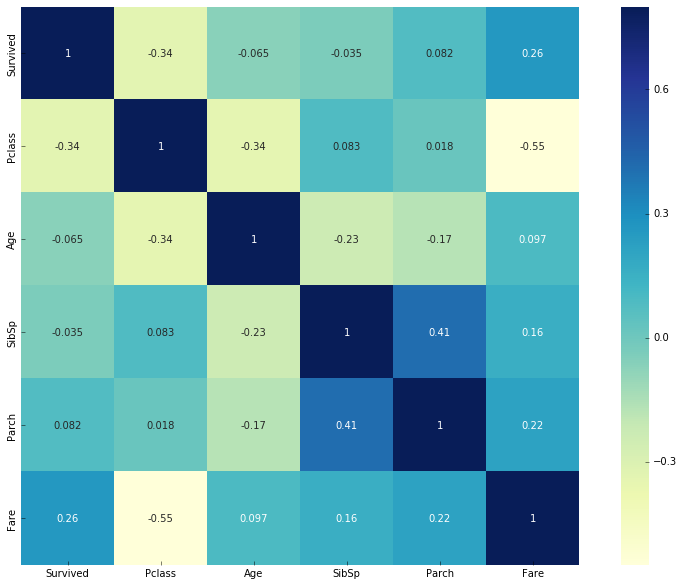

In [14]:
plt.subplots(figsize=(15,10))
sn.heatmap(train_df.drop("PassengerId",axis=1).corr(), vmax=0.8,square=True,annot=True,cmap="YlGnBu")